In [ ]:
###輪郭検出####
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\bubbledate\\00089.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)


#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
#print("総フレーム数: ", total_frame)
print("fps: ", fps)
print("動画の長さ: ", total_frame/fps, "[sec]")

#print(type(cap))
#print(cap.isOpened())
#------------------------------------------------------------------------------------------------------------------

import os

# ルートフォルダーのパス
root_path = "C:\\Users\\flow\\Desktop\\bubble_rasing_result"

# サブフォルダーの名前
image_folder = "image"
area_folder = "area"
contours_folder = "contours"
moment_folder = "moment"

# フォルダーのパスを連結
path = os.path.join(root_path, image_folder)
path1 = os.path.join(root_path, area_folder)
path2 = os.path.join(root_path, contours_folder)
path3 = os.path.join(root_path, moment_folder)

print(path1)
# パスとして使用する画像番号の桁数（3桁として扱う）
image_number_digits = 3


fps:  29.97002997002997
動画の長さ:  115.11500000000001 [sec]
C:\Users\flow\Desktop\bubble_rasing_result\area


In [ ]:

path = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\image\\"
path1 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\area\\"
path2 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\contours\\"
path3 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\moment\\"

# ビデオデータの読み込み
filename = "C:\\Users\\flow\\Desktop\\bubbledate\\00089.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)

cx_list = []
cy_list = []
area_list = []
number_list = []
num = 0
frame_count = 0  # フレーム番号のカウント

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        # フレーム番号が30の倍数のときだけ処理を行う
        if frame_count % 30 == 0:
            img = cv2.imwrite(path + "picture{:0=3}".format(num) + ".bmp", frame)

            img1 = cv2.imread(path + "picture{:0=3}".format(num) + ".bmp")
            gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            blur = cv2.bilateralFilter(gray, 5, 10, 10)
            cv2.imwrite(path + "graypicture{:0=3}".format(num) + ".bmp", blur)

            ret, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            cv2.imwrite(path + "nichipicture{:0=3}".format(num) + ".bmp", binary)

            contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            contours = sorted(contours, key=cv2.contourArea, reverse=True)

            img2 = cv2.imread(path + "picture{:0=3}".format(num) + ".bmp")
            cv2.drawContours(img2, [contours[2]], -1, (0, 255, 0), 2)
            cv2.imwrite(path2 + "rinkakupicture{:0=3}".format(num) + ".bmp", img2)

            cnt = contours[2]
            area = cv2.contourArea(cnt)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])

            moment = cv2.imread(path + "picture{:0=3}".format(num) + ".bmp")
            cv2.circle(moment, (cx, cy), 8, (0, 0, 255), -1)
            cv2.imwrite(path3 + 'moment{:0=3}'.format(num) + ".bmp", moment)

            cx_list.append(cx)
            cy_list.append(cy)
            area_list.append(area)
            number_list.append(num)
            num += 1

        frame_count += 1
    else:
        break


In [6]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\bubbledate\\00089.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)


#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
#print("総フレーム数: ", total_frame)
print("fps: ", fps)
print("動画の長さ: ", total_frame/fps, "[sec]")

path = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\image\\"
path1 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\area\\"
path2 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\contours\\"
path3 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\moment\\"
while cap.isOpened():
    ret, frame = cap.read()
    frame_count = 0  # フレームのカウントを初期化
    if ret == True:
        # フレーム番号が30の倍数のときだけ処理を行う
        if frame_count % 30 == 0:
            num = frame_count // 30 
            image = cv2.imwrite(path + "picture{:0=3}".format(num) + ".bmp", frame)

            color_image = cv2.imread(path + "picture{:0=3}".format(num) + ".bmp", cv2.IMREAD_COLOR)
            result_image =cv2.imwrite(path2 + "result_picture{:0=3}".format(num) + ".bmp", color_image)
            gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
            # 画像の平滑化（ガウシアンフィルタを使用）
            blurred_image = cv2.bilateralFilter(color_image,(5, 5), 0)
            edges= cv2.Canny(blurred_image, threshold1=100, threshold2=400)  # 適切な閾値を設定
            cv2.imwrite(path + "edges_picture{:0=3}".format(num) + ".bmp", edges )

            contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            # 各輪郭に対して処理を実行
            for idx, cnt in enumerate(contours):
                # 輪郭を描画
                cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)
                # 輪郭番号を描画
                text_position = tuple(cnt[cnt[:, :, 1].argmin()][0])  # 輪郭の最上点を取得
                cv2.putText(result_image, str(idx), text_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            # 検出された輪郭の数を表示
            num_contours = len(contours)
            print("Number of Contours:", num_contours)
            num += 1

        frame_count += 1
    else:
        break


fps:  29.97002997002997
動画の長さ:  115.11500000000001 [sec]


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'bilateralFilter'
> Overload resolution failed:
>  - bilateralFilter() missing required argument 'sigmaSpace' (pos 4)
>  - bilateralFilter() missing required argument 'sigmaSpace' (pos 4)


In [ ]:
path = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\image\\"
path1 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\area\\"
path2 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\contours\\"
path3 = "C:\\Users\\flow\\Desktop\\bubble_rasing_result\\moment\\"

# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\bubbledate\\00089.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)

cx_list=[]
cy_list=[]
area_list=[]
number_list=[]
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        img=cv2.imwrite(path+"picture{:0=3}".format(num)+".bmp",frame)
        #print("save picture{:0=3}".format(num)+".bmp")
        
        
        img1=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
        #print(type(img1)
        #グレースケールに変換
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
        #平滑化
        blur = cv2.bilateralFilter(gray, 5, 10, 10)
        # グレースケール画像の書き込み
        cv2.imwrite(path+"graypicture{:0=3}".format(num)+".bmp", blur)
        #print("save graypicture{:0=3}".format(b)+".bmp")
#---------------------------------------------------------------------------------------------------------------  
        # 2値化する。
        #ret, binary = cv2.threshold(gray,70, 255, cv2.THRESH_BINARY_INV)
        ret, binary = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        cv2.imwrite(path+"nichipicture{:0=3}".format(num)+".bmp",binary)

        #見つけた輪郭を元画像に描画
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        #contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        #n番目に面積の大きい輪郭を書くよ
        #cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
        #cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
        img2=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
        cv2.drawContours(img2, [contours[2]], -1, (0,255,0), 2)
        cv2.imwrite(path2+"rinkakupicture{:0=3}".format(num)+".bmp",img2)

        cnt=contours[2]
        area=cv2.contourArea(cnt)
        M=cv2.moments(cnt)
        #print(M)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        #print(cx,cy)
        #図心を画像に記載する
        moment=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
        cv2.circle(moment,(cx,cy),8,(0,0,255),-1)
        cv2.imwrite(path3+'moment{:0=3}'.format(num)+".bmp", moment)
        #plt.imshow(moment)
        #plt.show() 
        cx_list.append(cx)
        cy_list.append(cy)
        area_list.append(area)
        number_list.append(num)
        num+=1
    else:
        break        


[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.4142135623730951, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.4142135623730951, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4142135623730951, 0.0, 1.4142135623730951, 1.0, 0.0, 1.4142135623730951, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.4142135623730951, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.4142135623730951, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.4142135623730951, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.4142135623730951, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

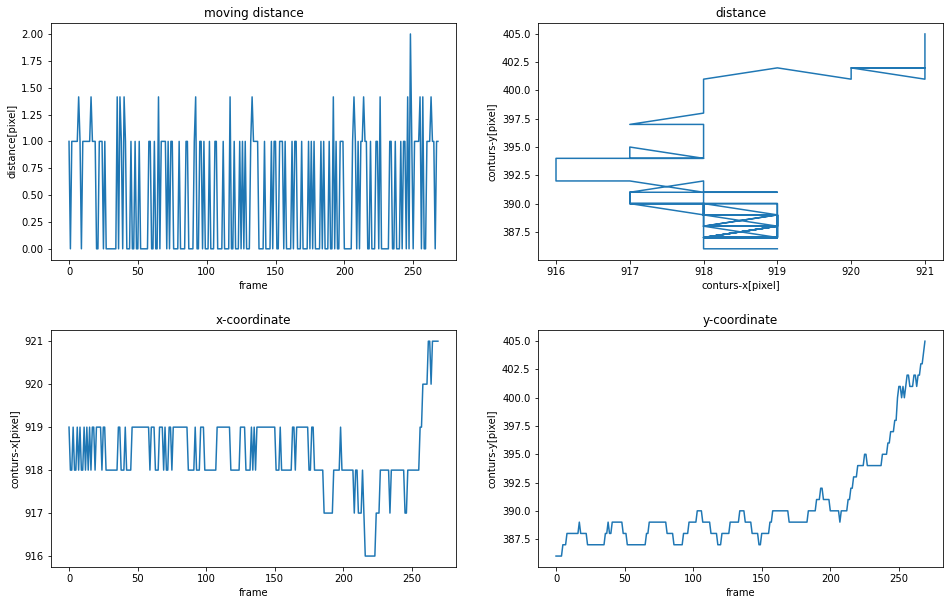

In [ ]:
path4="C:\\Users\\flow\\Desktop\\bubble_rasing_result\\graph\\"
#グラフで可視化
figure,axes=plt.subplots(2,2,figsize=(16,10))
# 余白を設定
plt.subplots_adjust(wspace=0.2, hspace=0.3)
 
area_list
number_list
cx_list
cy_list

x=list(range(269))
y=area_list
dis_list=[]
#set_plot(x,x1)
#set_scatter(x,y1)
for a in range(len(cx_list)-1):
    x1=cx_list[a]
    x2=cx_list[a+1]
    y1=cy_list[a]
    y2=cy_list[a+1]
    dis=((x1-x2)**2+(y1-y2)**2)**(1/2)
    dis_list.append(dis)
z=dis_list
x3=cx_list
y3=cy_list
x4=number_list
print(dis_list)
#print(len(x))
#print(len(z))

axes[0,0].plot(x,z)
axes[0,1].plot(x3,y3)
axes[1,0].plot(x4,x3)  
axes[1,1].plot(x4,y3) 

axes[0,0].set_title('moving distance')
axes[0,0].set_xlabel('frame')
axes[0,0].set_ylabel('distance[pixel]')

axes[0,1].set_title('distance')
axes[0,1].set_xlabel('conturs-x[pixel]')
axes[0,1].set_ylabel('conturs-y[pixel]')

axes[1,0].set_title('x-coordinate')
axes[1,0].set_xlabel('frame')
axes[1,0].set_ylabel('conturs-x[pixel]')

axes[1,1].set_title('y-coordinate')
axes[1,1].set_xlabel('frame')
axes[1,1].set_ylabel('conturs-y[pixel]')
plt.savefig(path4+'graph.jpg')


270
y座標 386 387
速度 0.0399149838433704 mm/s
y座標 387 387
速度 0.0 mm/s
y座標 387 387
速度 0.0 mm/s
y座標 387 387
速度 0.0 mm/s
y座標 387 388
速度 0.0399149838433704 mm/s
y座標 388 389
速度 0.0399149838433704 mm/s
y座標 389 390
速度 0.0399149838433704 mm/s
y座標 390 395
速度 0.199574919216852 mm/s


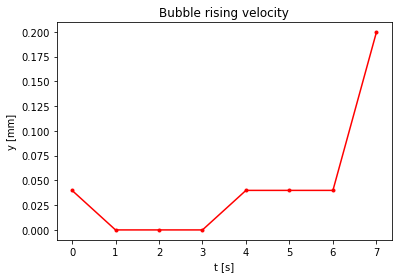

In [ ]:
print(len(cy_list))
v_list=[]
i=-30
j=0 
for a in range(int(len(cy_list)/30)-1):
    i+=30
    j+=30
    y1=cy_list[i]
    y2=cy_list[j]
    print('y座標',y1,y2)
    #print(i,j)
    y=(y2-y1)/mean
    print('速度',y,'mm/s')
    v_list.append(y)

x=list(range(8))
v=v_list
fig, ax = plt.subplots()
plt.plot(x,v,marker='.',color="red",label='velocity')
plt.title('Bubble rising velocity')
plt.xlabel('t [s]')
plt.ylabel('y [mm]')
plt.show
plt.savefig(path3+'velocitygraph.jpg')

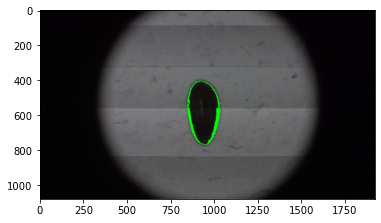

935 575


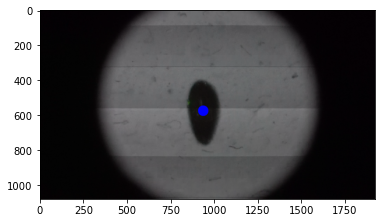

In [ ]:
#おためしさん
#https://cvtech.cc/pycvmoment/
#https://teratail.com/questions/245283

path1='C:\\Users\\flow\\Desktop\\yurikusa\\rinkakudata\\'
path2='C:\\Users\\flow\\Desktop\\yurikusa\\tokuimoment\\'
otameshi=cv2.imread(path+'picture192.bmp')
#画像の端塗りつぶしてもいいけど、そのままやりたい
#nuri=cv2.rectangle(otameshi,)
gray_ota = cv2.cvtColor(otameshi, cv2.COLOR_BGR2GRAY) 
ret, binary_ota = cv2.threshold(gray_ota,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary_ota, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#----------------------------------------------------------------------------------------------------------------------
#面積の降順にソート
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
#cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
#cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
cv2.drawContours(otameshi, [contours[2]], -1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()

#重心だす
#http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html?msclkid=a870e45dcee011ec996cca34e0d28f1d
#cv2.moments() 関数はあらゆるモーメントを計算します
cnt=contours[2]
M=cv2.moments(cnt)
#print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)
#図心を画像に記載する
moment=cv2.imread(path+'picture192.bmp')
cv2.circle(moment,(cx,cy),30,(0,0,255),-1)
cv2.imwrite(path2+'moment.bmp', moment)
plt.imshow(moment)
plt.show()

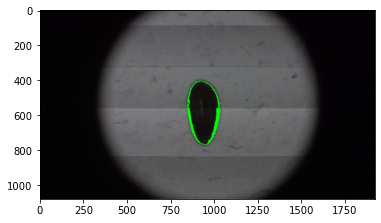

935 575


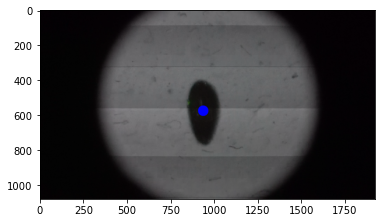

In [ ]:
#おためしさん
#https://cvtech.cc/pycvmoment/
#https://teratail.com/questions/245283

path1='C:\\Users\\flow\\Desktop\\yurikusa\\rinkakudata\\'
path2='C:\\Users\\flow\\Desktop\\yurikusa\\tokuimoment\\'
otameshi=cv2.imread(path+'picture192.bmp')
#画像の端塗りつぶしてもいいけど、そのままやりたい
#nuri=cv2.rectangle(otameshi,)
gray_ota = cv2.cvtColor(otameshi, cv2.COLOR_BGR2GRAY) 
ret, binary_ota = cv2.threshold(gray_ota,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(binary_ota, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#----------------------------------------------------------------------------------------------------------------------
#面積の降順にソート
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
#cv2.drawContours(otameshi, [contours[0]], -1, color=255, thickness=-1)
#cv2.drawContours(otameshi, [contours[1]], -1, color=128, thickness=-1)
cv2.drawContours(otameshi, [contours[2]], -1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()

#重心だす
#http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html?msclkid=a870e45dcee011ec996cca34e0d28f1d
#cv2.moments() 関数はあらゆるモーメントを計算します
cnt=contours[2]
M=cv2.moments(cnt)
#print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)
#図心を画像に記載する
moment=cv2.imread(path+'picture192.bmp')
cv2.circle(moment,(cx,cy),30,(0,0,255),-1)
cv2.imwrite(path2+'moment.bmp', moment)
plt.imshow(moment)
plt.show()

In [ ]:
n=1
max_cnt = max(contours, key=lambda x: cv2.contourArea(x))
#2番目に大きい輪郭を抽出
if n>=2:
	max_cnt2 = max(contours, key=lambda x: cv2.contourArea(x))[-1]
	if n>=3:
		max_cnt3 = max(contours, key=lambda x: cv2.contourArea(x))[-2]    

#print("contours=",len(contours),  "hierarchy=",len(hierarchy) )
#print(type(contours[1].shape))
#print(contours[1].shape)
#print(contours[1].shape[0])
print(type(contours))
otameshi_rin=cv2.drawContours(otameshi, max_cnt3,-1, (0,255,0), 2)
cv2.imwrite(path1+'resultarea.bmp', otameshi)
plt.imshow(otameshi)
plt.show()